In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------------ --------------- 2.4/3.8 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 9.9 MB/s eta 0:00:00
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for peewee: 

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
stock = 'AAPL'
df = yf.download(stock, start='2018-01-01', end='2024-11-27')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517288,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705482,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168938,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016026,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


In [8]:
df = df[['Adj Close']]

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df

Price,Adj Close
Ticker,AAPL
Date,
2018-01-02,40.524345
2018-01-03,40.517288
2018-01-04,40.705482
2018-01-05,41.168938
2018-01-08,41.016026
...,...
2024-11-20,229.000000
2024-11-21,228.520004


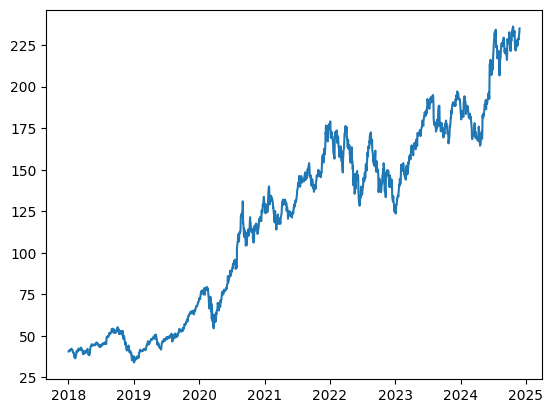

In [12]:
plt.plot(df)

it is not stationary because there is no consistency. we also dont have enough data to see if there is a cycle since apple wasnt around during the last global health crisis to compare it with COVID.

In [13]:
result = adfuller(df['Adj Close'])

In [14]:
result[0]

-0.22225690904782308

In [15]:
result[1]

0.9358161294059679

this shows the data is not stationary because the score is higher than .05. ask gpt more about this.

In [16]:
np.var(df['Adj Close'])

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Ticker
AAPL    3358.670216
dtype: float64

In [17]:
print(np.var(df['Adj Close']))
print(np.std(df['Adj Close']))
print(np.mean(df['Adj Close']))

Ticker
AAPL    3358.670216
dtype: float64
Ticker
AAPL    57.954035
dtype: float64
120.73701508437532


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(array([437., 124.,  85.,  62., 201., 268., 247., 191.,  22., 101.]),
 array([ 33.95253754,  54.17929459,  74.40605164,  94.63280869,
        114.85956573, 135.08632278, 155.31307983, 175.53983688,
        195.76659393, 215.99335098, 236.22010803]),
 <BarContainer object of 10 artists>)

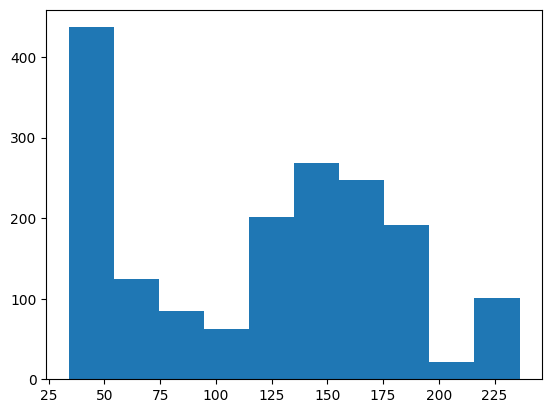

In [18]:
plt.hist(df['Adj Close'])

In [19]:
df['price_diff'] = df['Adj Close'].shift() #shift moves everthing down a row 

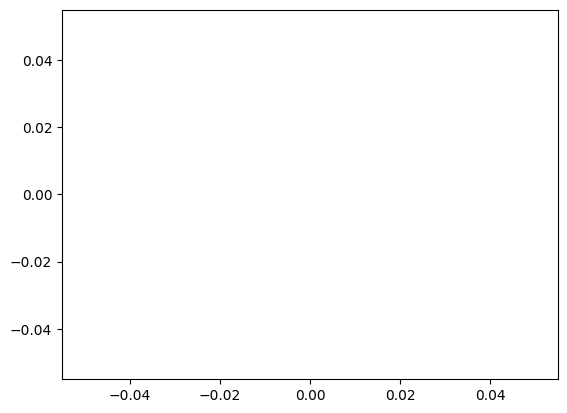

In [24]:
plt.scatter(df['price_diff'],df['Adj Close'])

In [22]:
df['t-2'] = df['Adj Close'].shift(2)

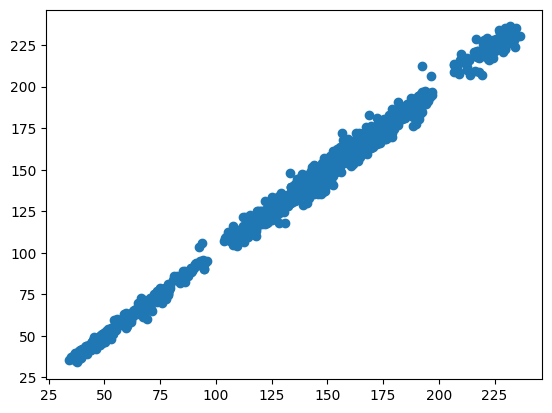

In [23]:
plt.scatter(df['t-2'], df['Adj Close'])

In [25]:
df['t-50'] = df['Adj Close'].shift(50)

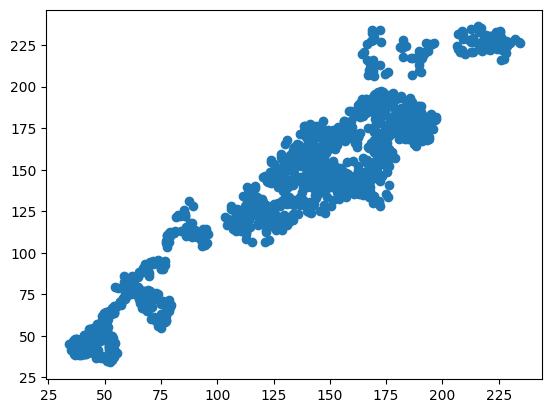

In [26]:
plt.scatter(df['t-50'], df['Adj Close'])

the further back we go the weaker the relationship. if you want to predict apple stock price tomorrwo you are better off looking at data from yestreday and today rather than 2 months ago.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

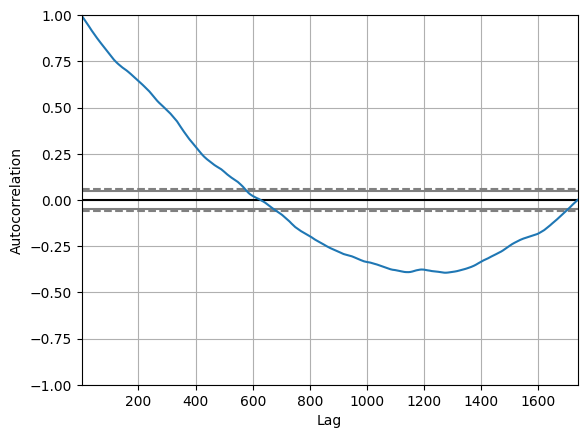

In [27]:
pd.plotting.autocorrelation_plot(df['Adj Close'])

In [ ]:
# fit Arima MODEL
model = ARIMA(df['Adj Close'], order=(1,1,1))

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

In [29]:
fit = model.fit()

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1738
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3904.040
Date:                Wed, 27 Nov 2024   AIC                           7814.080
Time:                        20:42:42   BIC                           7830.460
Sample:                             0   HQIC                          7820.138
                               - 1738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5655      0.440      1.285      0.199      -0.297       1.428
ma.L1         -0.5883      0.434     -1.356      0.175      -1.439       0.262
sigma2         5.2450      0.108     48.549      0.0

In [31]:
forecast = fit.forecast(steps=30)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [32]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

In [33]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_series = pd.Series(forecast, index=forecast_index)

In [34]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

In [35]:
forecast_df = pd.concat([pd.DataFrame(forecast_index), pd.DataFrame(forecast.reset_index())], axis=1)
forecast_df.drop('index', axis=1, inplace=True)
forecast_df.rename({0:'date'},axis=1, inplace=True)

In [36]:
forecast_df.set_index('date', inplace=True)
forecast_df

,predicted_mean
date,
2024-11-27,234.956963
2024-11-28,234.898697
2024-11-29,234.865748
2024-12-02,234.847116
2024-12-03,234.836580
2024-12-04,234.830621
2024-12-05,234.827252
2024-12-06,234.825346
2024-12-09,234.824269


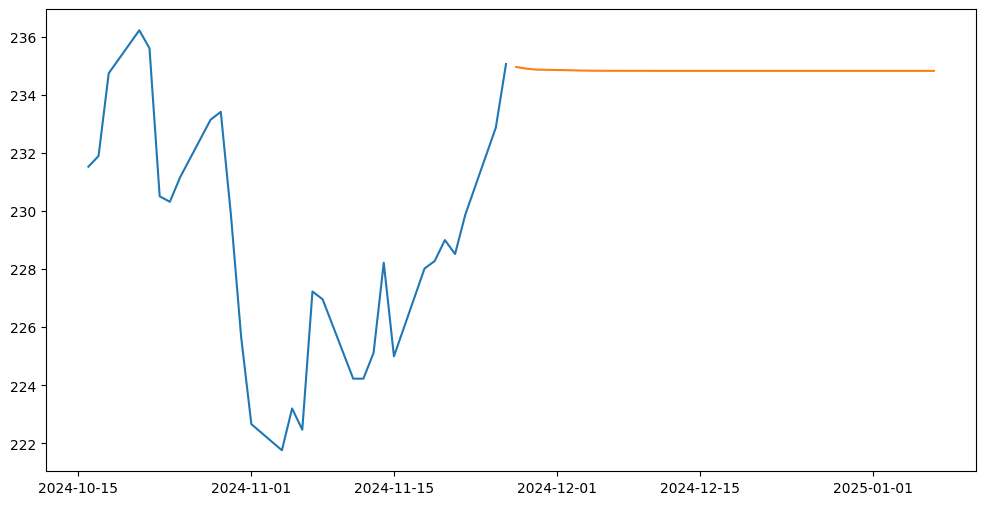

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].iloc[-30:])
plt.plot(forecast_df)

In [38]:
df.rename({'price_diff':'t-1'}, inplace=True)

In [39]:
df.rename({'price_diff':'t-1'}, axis=1,inplace=True)

In [40]:
df.drop('t-50', axis=1, inplace=True)

In [41]:
df['t-3'] = df['Adj Close'].shift(3)

In [42]:
#train test split
train_size = int(0.8 * len(df))

In [43]:
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [44]:
df

Price,Adj Close,t-1,t-2,t-3
Ticker,AAPL,,,
Date,,,,
2018-01-02,40.524345,NaN,NaN,NaN
2018-01-03,40.517288,NaN,NaN,NaN
2018-01-04,40.705482,NaN,40.524345,NaN
2018-01-05,41.168938,NaN,40.517288,40.524345
2018-01-08,41.016026,NaN,40.705482,40.517288
...,...,...,...,...
2024-11-20,229.000000,NaN,228.020004,225.000000
2024-11-21,228.520004,NaN,228.279999,228.020004


In [45]:
X_train = train[['t-1', 't-2', 't-3']]
y_train = train['Adj Close']
X_test = test[['t-1', 't-2', 't-3']]
y_test = test['Adj Close']

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [47]:
y_pred = rf.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

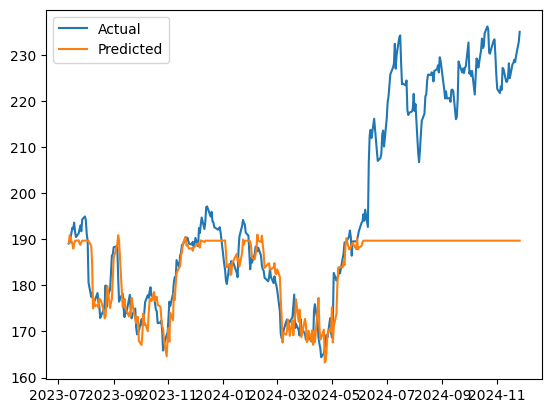

In [49]:
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.legend()

In [50]:
arima_forecast = fit.forecast(steps = len(y_test))

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))

In [52]:
arima_rmse

44.641151898948735

In [53]:
rmse

20.398844935549448